In [1]:

import numpy as np
from scipy.signal import resample

# Load the data
#avg_entries = np.load("../../../sca101/generators/new_entries.npy")
#subset_traces = np.load("../../../sca101/generators/averaged_traces1000-0.890.npy")
#avg_entries = np.load("destination/folder/var_0/inputs.npy")
#subset_traces = np.load("destination/folder/var_0/traces.npy")
avg_entries = np.load("avg_entries.npy")
subset_traces = np.load("avg_traces.npy")
# Select 50 inputs and their corresponding traces without limiting the number of points
selected_avg_entries = avg_entries[:300]
selected_subset_traces = subset_traces[:300]

# Resample the traces to 5000 points
resampled_subset_traces = resample(selected_subset_traces, 5000, axis=1)

# Data cleaning: Remove NaN and extreme values

# Remove NaN values from selected_avg_entries
nan_indices = np.argwhere(np.isnan(selected_avg_entries))
cleaned_avg_entries = np.delete(selected_avg_entries, nan_indices, axis=0)

# Remove corresponding traces
cleaned_subset_traces = np.delete(resampled_subset_traces, nan_indices, axis=0)

#np.save("cleaned_avg_entries300.npy", cleaned_avg_entries)

#np.save("cleaned_avg_traces300.npy", cleaned_subset_traces)

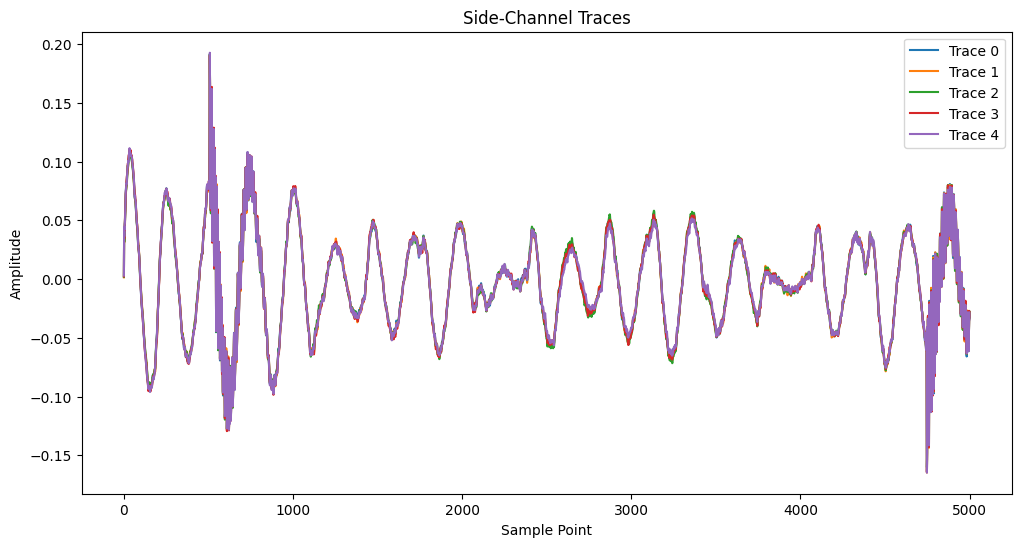

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import struct

traces = cleaned_subset_traces
inputs = cleaned_avg_entries

    
# Visualize some traces
plt.figure(figsize=(12, 6))
for i in range(5):  # Adjust the range as needed
    plt.plot(traces[i], label=f'Trace {i}')
plt.title('Side-Channel Traces')
plt.xlabel('Sample Point')
plt.ylabel('Amplitude')
plt.legend()
plt.show()






In [ ]:
import numpy as np
import struct
from scipy.stats import pearsonr
from joblib import Parallel, delayed
import matplotlib.pyplot as plt



# Define functions for CPA analysis
def float_to_binary(num):
    """Convert a floating point number to its binary representation in IEEE 754 format."""
    return ''.join(f'{c:08b}' for c in struct.pack('!f', num))

def hamming_weight(binary_str):
    """Calculate the Hamming weight (number of '1's) in the binary string."""
    return binary_str.count('1')

def calculate_correlations_for_weight(traces, inputs, weight):
    hws = [hamming_weight(float_to_binary(input_value * weight)) for input_value in inputs]

    correlations = np.array([pearsonr(traces[:, sample_point], hws)[0] for sample_point in range(traces.shape[1])])

    # Handle NaN values
    correlations = np.nan_to_num(correlations)

    return correlations

# Hypothetical weights range
hypothetical_weights = np.linspace(0.5, 1.5, 100)  # Adjust the range and step as needed

# Using joblib to parallelize the correlation calculation
num_cores = 4  # Adjust this based on your machine's capabilities
results = Parallel(n_jobs=num_cores)(delayed(calculate_correlations_for_weight)(subset_traces, avg_entries, weight) for weight in hypothetical_weights)

# Combine the results
correlations = np.array(results)

# Find the index of the maximum correlation
max_corr_index = np.unravel_index(np.argmax(correlations, axis=None), correlations.shape)

# Extracting the most likely weight
most_likely_weight = hypothetical_weights[max_corr_index[0]]

print("Most Likely Weight:", most_likely_weight)

# Plotting function for correlation scores
def plot_correlations(hypothetical_weights, correlations):
    plt.figure(figsize=(12, 6))
    for i in range(correlations.shape[1]):
        plt.plot(hypothetical_weights, correlations[:, i], label=f'Point {i}')
    plt.title('Correlation Scores for the Multiplication')
    plt.xlabel('Hypothetical Weight')
    plt.ylabel('Correlation Score')
    plt.legend()
    plt.show()

# Plot the correlations
plot_correlations(hypothetical_weights, correlations)


In [ ]:

# Function to perform CPA with a variable number of traces
def cpa_with_variable_traces(num_traces):
    # ... existing CPA code modified to use num_traces ...
    return correlation_result

# Iteratively increase the number of traces and store results
trace_counts = [10, 50, 100, 500, 1000] # Example values
correlation_results = []
for count in trace_counts:
    result = cpa_with_variable_traces(count)
    correlation_results.append(result)


In [ ]:

import matplotlib.pyplot as plt

# Function to plot correlation results
def plot_correlation_results(trace_counts, correlation_results):
    plt.figure(figsize=(10, 6))
    plt.plot(trace_counts, correlation_results, marker='o')
    plt.xlabel('Number of Traces')
    plt.ylabel('Correlation Strength')
    plt.title('CPA Correlation Strength vs Number of Traces')
    plt.grid(True)
    plt.show()

# Plot the results
plot_correlation_results(trace_counts, correlation_results)


In [ ]:

# Function to evaluate timing of CPA
def time_cpa(num_traces):
    start_time = time.time()
    cpa_with_variable_traces(num_traces)
    end_time = time.time()
    return end_time - start_time

# Measure and store timing for each trace count
timing_results = [time_cpa(count) for count in trace_counts]

# Plot timing results
plt.figure(figsize=(10, 6))
plt.plot(trace_counts, timing_results, marker='x', color='red')
plt.xlabel('Number of Traces')
plt.ylabel('Time (seconds)')
plt.title('CPA Execution Time vs Number of Traces')
plt.grid(True)
plt.show()
